In [53]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score

In [10]:
# First we start by uploading the database into python

db = pd.read_csv("C://Users/wawes/OneDrive/Desktop/ZETECH UNIVERSITY/Y4S2/MACHINE LEARNING/Topic 2/churn.csv")

In [8]:
# We display a summary of the database to familiarise with the data and fields.

db

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# From the database structure, we view the data types used which are int, object and float. There are no null values in the
# database with a total of 14 columns and 10,000 entries

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
# For data preparation, we convert the gender and Geography column into integers since they will be used in categorizing 
# and creating comparisons in the data



def label_encoder(db_: pd.DataFrame(), columns_name_: list):
    le = LabelEncoder()
    for i in columns_name_:
        le.fit(db_[i])
        db_[i] = le.transform(db_[i])
    return db_

db = label_encoder(db, ['Geography', 'Gender'])
db

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [72]:
# A summary of the population from the different geographical areas.

db['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [58]:
# Here we get the description of the database. from the description we can tell that the oldest client is of age 92 years
# with the youngest client being 18 years old.the highest earning client has a salary of 199,992.48. The lowest earner 
# has a salary of 11.58.


db.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

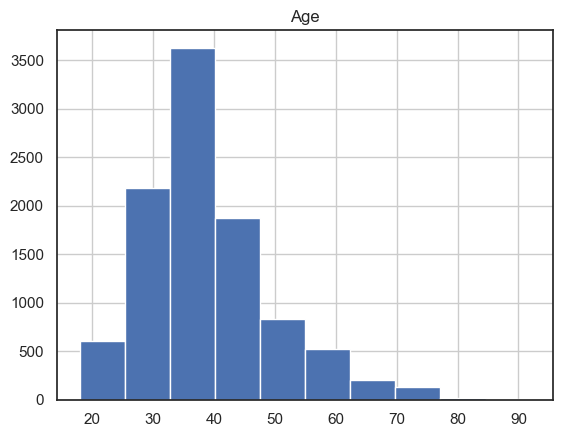

In [59]:
# presentation of the age bracket distribution of members with the age bracket of 30 to 40 being most of the members

db.hist('Age')

<Axes: >

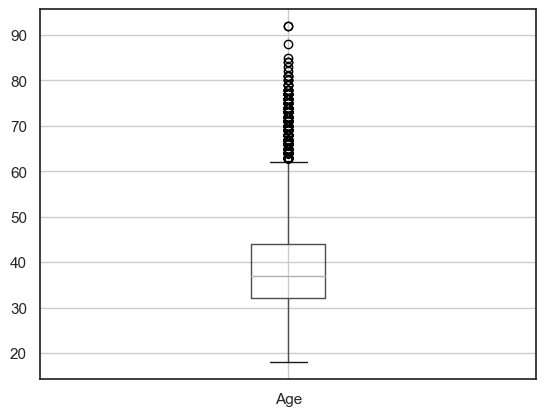

In [7]:
# Box plot representaion of the age distribution

db.boxplot('Age')

<Axes: >

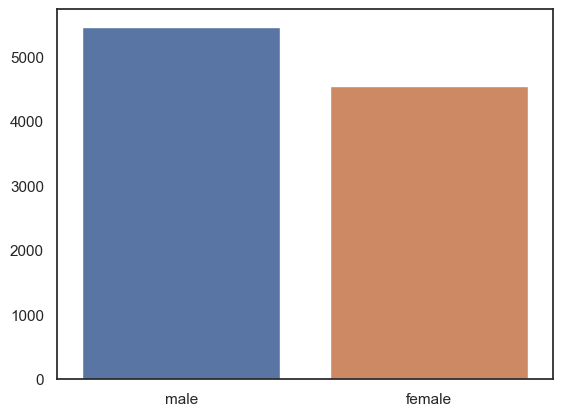

In [48]:
# Comparison between male and female members in the database

sb.barplot(x=['male', 'female'],
            y=db['Gender'].value_counts().values)

<Axes: >

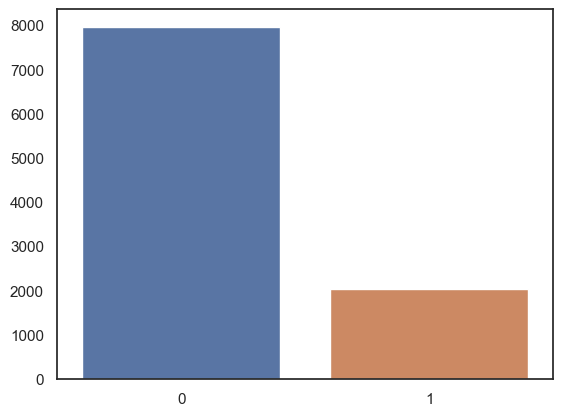

In [50]:
# This is a comparison between exited and active members

sb.barplot(x=db['Exited'].value_counts().keys(),
            y=db['Exited'].value_counts().values)

In [60]:
# Summary of highest earners

db.sort_values(by='EstimatedSalary',ascending=False)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,6647,15662021,Lucciano,685,2,0,42,2,0.00,2,0,0,199992.48,0
3580,3581,15634359,Dyer,639,1,0,41,5,98635.77,1,1,0,199970.74,0
4417,4418,15697270,Gannon,608,2,1,27,4,153325.10,1,1,1,199953.33,0
9096,9097,15762331,Moss,569,0,1,37,9,178755.84,1,1,0,199929.17,0
8926,8927,15709136,Adams,620,0,1,28,8,0.00,2,1,1,199909.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,4990,15602851,Ozioma,629,0,1,40,9,0.00,1,1,0,106.67,0
5548,5549,15639662,Phillips,710,0,1,38,2,0.00,2,1,0,96.27,0
9010,9011,15786463,Hsing,645,1,0,59,8,121669.93,2,0,0,91.75,1
9647,9648,15679693,Walker,625,0,1,31,5,0.00,2,0,1,90.07,0


In [61]:
# Summary of lowest earners

db.sort_values(by='EstimatedSalary')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,2363,15791053,Lucciano,709,1,1,45,4,122917.71,1,1,1,11.58,1
9647,9648,15679693,Walker,625,0,1,31,5,0.00,2,0,1,90.07,0
9010,9011,15786463,Hsing,645,1,0,59,8,121669.93,2,0,0,91.75,1
5548,5549,15639662,Phillips,710,0,1,38,2,0.00,2,1,0,96.27,0
4989,4990,15602851,Ozioma,629,0,1,40,9,0.00,1,1,0,106.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,8927,15709136,Adams,620,0,1,28,8,0.00,2,1,1,199909.32,0
9096,9097,15762331,Moss,569,0,1,37,9,178755.84,1,1,0,199929.17,0
4417,4418,15697270,Gannon,608,2,1,27,4,153325.10,1,1,1,199953.33,0
3580,3581,15634359,Dyer,639,1,0,41,5,98635.77,1,1,0,199970.74,0


In [62]:
# No duplicate entries in the database

db.duplicated().sum()

0

In [64]:
# The three countries represented are France Spain and germany

db['Geography'].unique()

array([0, 2, 1], dtype=int64)

In [65]:
# There are no null values in the database

db.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [66]:
# A summary of the active members

db[db['IsActiveMember']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,15581736,Bartlett,673,1,1,47,1,183579.54,2,0,1,34047.54,0
9987,9988,15588839,Mancini,606,2,1,30,8,180307.73,2,1,1,1914.41,0
9989,9990,15605622,McMillan,841,2,1,28,4,0.00,2,1,1,179436.60,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0


In [67]:
# A summary of dormant members

db[db['IsActiveMember']==0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,1,0,29,4,115046.74,4,1,0,119346.88,1
10,11,15767821,Bearce,528,0,1,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,0,1,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,0,0,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [68]:
# Viewing correlations between different fields

db.corr()

C:\Users\wawes\AppData\Local\Temp\ipykernel_2916\2811627449.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  db.corr()


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


In [69]:
# Learning patterns according to the different ages

db.groupby('Age').max()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,,,,,,
18,9933,15813451,Weigel,844,2,1,10,176139.50,2,1,1,197322.13,1
19,9680,15809991,Webster,850,2,1,9,166133.28,2,1,1,193008.52,1
20,9941,15791972,Uchechukwu,850,2,1,10,204223.03,2,1,1,197582.79,1
21,9889,15813894,Zhdanov,747,2,1,10,210433.08,3,1,1,197297.77,1
22,9797,15814267,Zhdanova,850,2,1,10,186788.96,3,1,1,198032.93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,9310,15621644,Lombardi,678,1,1,6,123356.63,1,0,1,92934.41,0
84,3532,15798024,Lori,537,1,1,8,92242.34,1,1,1,188484.52,1
85,3034,15578006,Yao,787,0,0,10,0.00,2,1,1,116537.96,0


<Axes: >

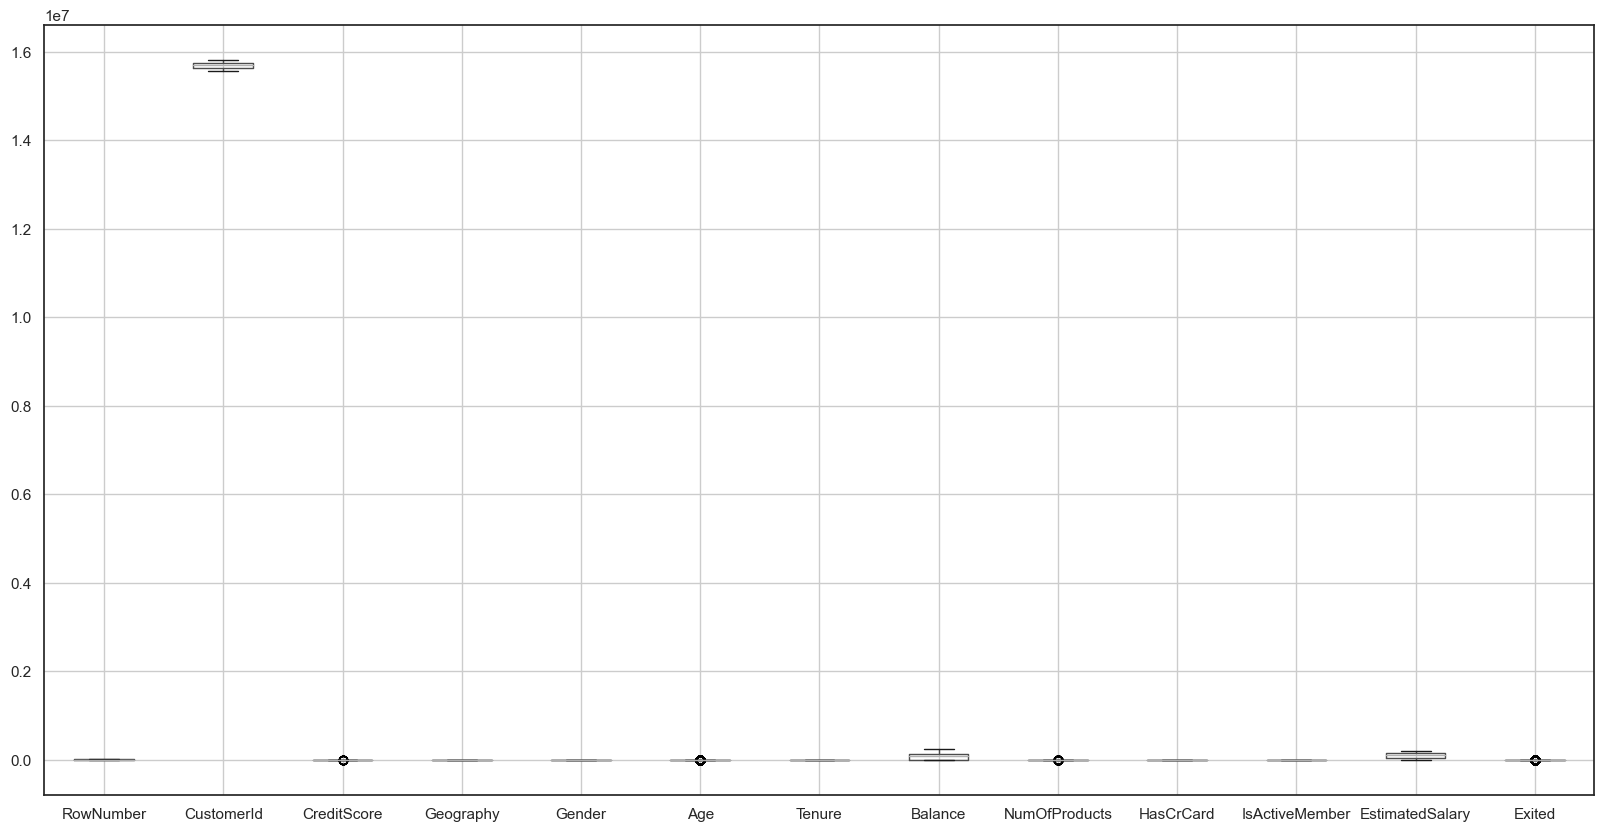

In [71]:
# Trying to detect outliers. Outlier appear on customer Id which is not an alarm for outlier

db.boxplot(figsize=(20,10))

<Axes: >

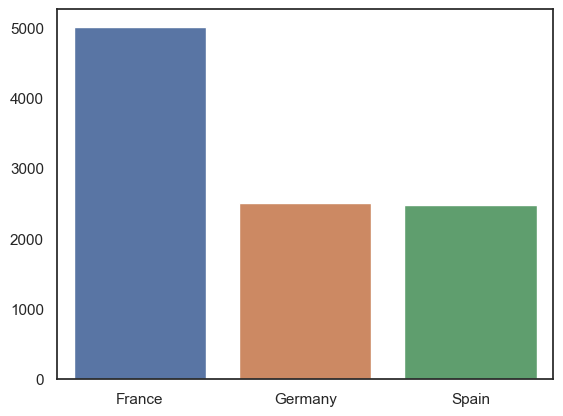

In [46]:
# Representation of countires with the most members. France leads followed by Germany and spain

sb.barplot(x=['France', 'Germany', 'Spain'],
            y=[*db['Geography'].value_counts().values])

<Axes: >

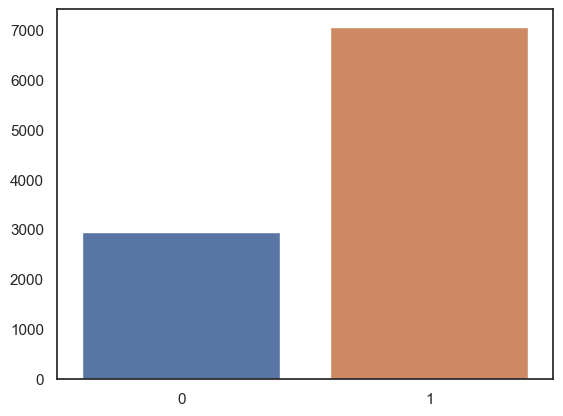

In [47]:
# Comparison of members who have cards and those that don't

sb.barplot(x=db['HasCrCard'].value_counts().keys(),
            y=db['HasCrCard'].value_counts().values)